In [114]:
from sklearn.datasets import fetch_20newsgroups
from matplotlib import pyplot as plt
import numpy as np
from numpy import array

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF


import time
import itertools

import pickle

In [3]:
computer_technology_subclasses = ['comp.graphics',
                                  'comp.os.ms-windows.misc',
                                  'comp.sys.ibm.pc.hardware',
                                  'comp.sys.mac.hardware']

recreational_activity_subclasses = ['rec.autos',
                                    'rec.motorcycles',
                                    'rec.sport.baseball',
                                    'rec.sport.hockey']

categories = computer_technology_subclasses + recreational_activity_subclasses

In [4]:
dataset = fetch_20newsgroups(subset='all',categories=categories, shuffle=True, 
                             random_state=42, remove=('headers', 'footers'))

dataset_binary_target = [0 if t<4 else 1 for t in dataset.target]

In [5]:
# QUESTION 1: Report the dimensions of the TF-IDF matrix you get.

In [81]:
# Generate TF-IDF Data, with min_df=3, removed stop words, no stemming
vectorizer = CountVectorizer(min_df=3, stop_words='english')
X_counts = vectorizer.fit_transform(dataset.data)

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

# Print the shape of the datasets
print("QUESTION 1: Report the dimensions of the TF-IDF matrix you get\n")
print('X_tfidf:',X_tfidf.shape)


QUESTION 1: Report the dimensions of the TF-IDF matrix you get

X_tfidf: (7882, 23522)


In [7]:
# QUESTION 2: Report the contingency table of your clustering result.

In [ ]:
# QUESTION 3: Report the 5 measures above for the K-means clustering results you get.

In [137]:
# contingency table (confusion matrix)
def plot_contingency_table(cm, title='Contingency Table',
                           cmap=plt.cm.YlOrBr,
                           actual_class_names=['Class 1', 'Class 2'],
                           cluster_class_names=['Cluster 1', 'Cluster 2']):
    plt.gcf().clear()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=16)
    plt.colorbar()
    tick_marks = np.arange(len(actual_class_names))
    plt.xticks(tick_marks, actual_class_names)
    plt.yticks(tick_marks, cluster_class_names)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center")

    plt.tight_layout()
    plt.ylabel('Cluster Class', fontsize=12)
    plt.xlabel('Actual Class', fontsize=12)
    plt.show()
    
def k_means_clustering(training_data, n_clusters=8, random_state=None, max_iter=300, n_init=10):
    start = time.time()
    km = KMeans(n_clusters=n_clusters,random_state=random_state,max_iter=max_iter,n_init=n_init)
    km.fit(training_data)
    print("Finished clustering with %i seeds in %f seconds" % (N_INIT, time.time()-start))

    contin_matrix = metrics.cluster.contingency_matrix(dataset_binary_target, km.labels_)
    print("Show Contingency Matrix:")
    
    plot_contingency_table(contin_matrix)
    
    print("Report 5 Measures for K-Means Clustering")
    
    homogeneity = metrics.homogeneity_score(dataset_binary_target, km.labels_)
    completeness = metrics.completeness_score(dataset_binary_target, km.labels_)
    v_measure = metrics.v_measure_score(dataset_binary_target, km.labels_)
    adjusted_rand_index = metrics.adjusted_rand_score(dataset_binary_target, km.labels_)
    adjusted_mutual_info = metrics.adjusted_mutual_info_score(dataset_binary_target, km.labels_)

    print("Homogeneity Score: %f" % homogeneity)
    print("Completeness Score: %f" % completeness)
    print("V-Measure Score: %f" % v_measure)
    print("Adjusted Rand Index: %f" % adjusted_rand_index)
    print("Adjusted Mutual Information: %f" % adjusted_mutual_info)
    
    return {
        "homogeneity": homogeneity,
        "completeness": completeness,
        "v_measure": v_measure,
        "adjusted_rand_index": adjusted_rand_index,
        "adjusted_mutual_info": adjusted_mutual_info }


def svd_dimension_reduction(training_data, n_components=2):
    start = time.time()
    svd = TruncatedSVD(n_components = n_components)
    svd_dataset = svd.fit_transform(training_data)
    print("SVD complete after %f seconds" % (time.time()-start))
    return svd_dataset , svd

def nmf_dimension_reduction(training_data, n_components=None):
    start = time.time()
    nmf = NMF(n_components=n_components, random_state=0)
    nmf_dataset = nmf.fit_transform(training_data)
    print("NMF complete after %f seconds" % (time.time()-start))
    return nmf_dataset , svd

    
def plot_percent_variance(svd):
    plt.gcf().clear()
    print("Plot Percent of Variance")
    plt.plot(np.cumsum(svd.explained_variance_ratio_[:1000]))
    plt.xlabel("Dimension Index")
    plt.ylabel("Percentage of Total Variance")
    plt.show()    
    
    


Finished clustering with 30 seeds in 139.841612 seconds
Show Contingency Matrix:


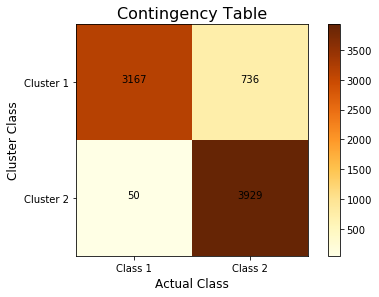

Report 5 Measures for K-Means Clustering
Report 5 Measures for K-Means Clustering
 
Homogeneity Score: 0.580535
Completeness Score: 0.595065
V-Measure Score: 0.587710
Adjusted Rand Index: 0.640848
Adjusted Mutual Information: 0.580496


In [73]:
# Apply K-means clustering with k=2 using the TF-IDF data. Use random_state=0, max_iter >= 1000, n_init>=30.

k_means = k_means_clustering(X_tfidf, n_clusters=2,random_state=0,max_iter=1000,n_init=30)


In [74]:
k_means

{'adjusted_mutual_info': 0.58049645559720431,
 'adjusted_rand_index': 0.64084832928746194,
 'completeness': 0.59506536451348058,
 'homogeneity': 0.58053485808831906,
 'v_measure': 0.58771031222936498}

In [75]:
# QUESTION 4: Report the plot of the percent of variance the top r principle compo-
# nents can retain v.s. r, for r = 1 to 1000.

SVD complete after 20.291618 seconds
Plot Percent of Variance


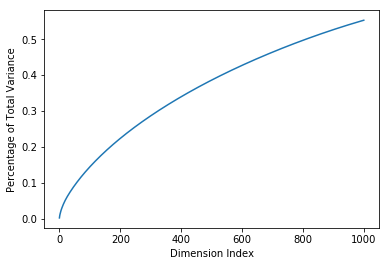

In [107]:
svd_dataset, svd = svd_dimension_reduction(X_tfidf, n_components = 1000)
plot_percent_variance(svd)

In [ ]:
# QUESTION 5:
# Let r be the dimension that we want to reduce the data to (i.e. n components).
# Try r = 1; 2; 3; 5; 10; 20; 50; 100; 300, and plot the 5 measure scores v.s. r for both
# SVD and NMF.
# Report the best r choice for SVD and NMF respectively.
# Note: what is \best" after all? What if some measures contradict with each other? Here you are faced with this
# challenge that you need to decide which measure you value the most, and design your own standard of \best".
# Please explain your standard and justify it.

n_components: 1
SVD complete after 0.139107 seconds
Finished clustering with 30 seeds in 0.156991 seconds
Show Contingency Matrix:


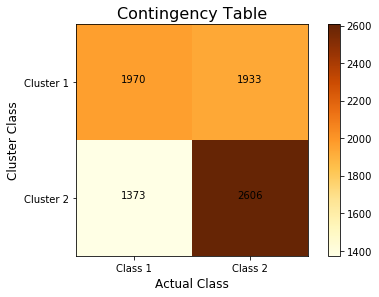

Report 5 Measures for K-Means Clustering
Homogeneity Score: 0.018910
Completeness Score: 0.019229
V-Measure Score: 0.019068
Adjusted Rand Index: 0.025839
Adjusted Mutual Information: 0.018820
n_components: 2
SVD complete after 0.100645 seconds
Finished clustering with 30 seeds in 0.171201 seconds
Show Contingency Matrix:


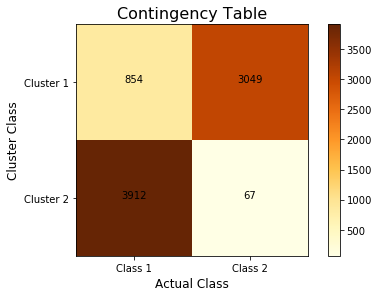

Report 5 Measures for K-Means Clustering
Homogeneity Score: 0.530608
Completeness Score: 0.548025
V-Measure Score: 0.539176
Adjusted Rand Index: 0.587168
Adjusted Mutual Information: 0.530565
n_components: 3
SVD complete after 0.167624 seconds
Finished clustering with 30 seeds in 0.227709 seconds
Show Contingency Matrix:


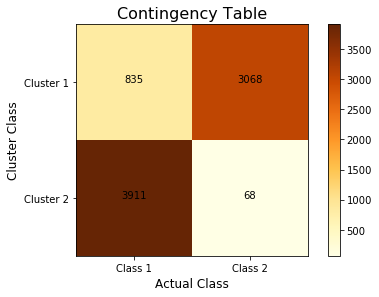

Report 5 Measures for K-Means Clustering
Homogeneity Score: 0.535878
Completeness Score: 0.552591
V-Measure Score: 0.544106
Adjusted Rand Index: 0.594190
Adjusted Mutual Information: 0.535835
n_components: 5
SVD complete after 0.174205 seconds
Finished clustering with 30 seeds in 0.194170 seconds
Show Contingency Matrix:


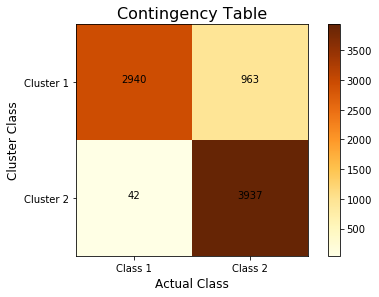

Report 5 Measures for K-Means Clustering
Homogeneity Score: 0.515112
Completeness Score: 0.538302
V-Measure Score: 0.526452
Adjusted Rand Index: 0.554952
Adjusted Mutual Information: 0.515067
n_components: 10
SVD complete after 0.174081 seconds
Finished clustering with 30 seeds in 0.294545 seconds
Show Contingency Matrix:


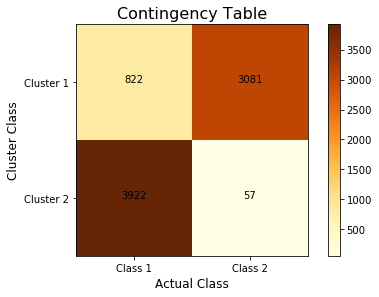

Report 5 Measures for K-Means Clustering
Homogeneity Score: 0.547484
Completeness Score: 0.564470
V-Measure Score: 0.555847
Adjusted Rand Index: 0.603617
Adjusted Mutual Information: 0.547442
n_components: 20
SVD complete after 0.374603 seconds
Finished clustering with 30 seeds in 0.440724 seconds
Show Contingency Matrix:


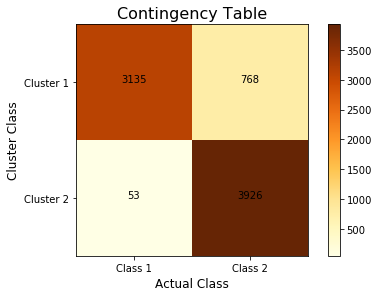

Report 5 Measures for K-Means Clustering
Homogeneity Score: 0.567749
Completeness Score: 0.583163
V-Measure Score: 0.575352
Adjusted Rand Index: 0.626706
Adjusted Mutual Information: 0.567709
n_components: 50
SVD complete after 0.670897 seconds
Finished clustering with 30 seeds in 0.753698 seconds
Show Contingency Matrix:


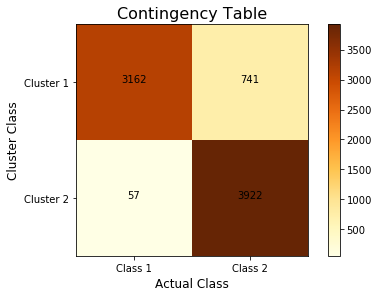

Report 5 Measures for K-Means Clustering
Homogeneity Score: 0.573834
Completeness Score: 0.588115
V-Measure Score: 0.580887
Adjusted Rand Index: 0.635982
Adjusted Mutual Information: 0.573795
n_components: 100
SVD complete after 1.127726 seconds
Finished clustering with 30 seeds in 1.276575 seconds
Show Contingency Matrix:


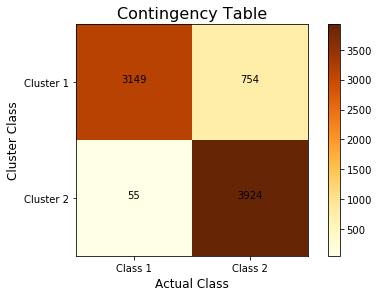

Report 5 Measures for K-Means Clustering
Homogeneity Score: 0.570934
Completeness Score: 0.585760
V-Measure Score: 0.578252
Adjusted Rand Index: 0.631537
Adjusted Mutual Information: 0.570895
n_components: 300
SVD complete after 3.735265 seconds
Finished clustering with 30 seeds in 4.559667 seconds
Show Contingency Matrix:


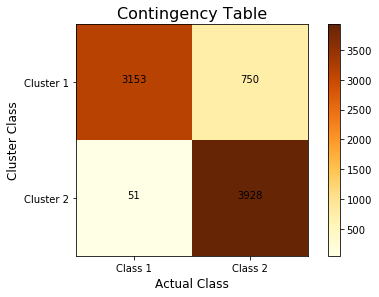

Report 5 Measures for K-Means Clustering
Homogeneity Score: 0.575136
Completeness Score: 0.590071
V-Measure Score: 0.582507
Adjusted Rand Index: 0.634768
Adjusted Mutual Information: 0.575097


In [123]:
svd_homogeneity = []
svd_completeness = []
svd_v_measure = []
svd_adjusted_mutual_info = []
svd_adjusted_rand_index = []

for r in [1, 2, 3, 5, 10, 20, 50, 100, 300]:
    print('n_components:', r)
    svd_dataset,svd = svd_dimension_reduction(X_tfidf, n_components = r)
    k_means = k_means_clustering(svd_dataset, n_clusters=2,random_state=0,max_iter=1000,n_init=30)
    svd_homogeneity.append(k_means['homogeneity'])
    svd_completeness.append(k_means['completeness'])
    svd_v_measure.append(k_means['v_measure'])
    svd_adjusted_mutual_info.append(k_means['adjusted_mutual_info'])
    svd_adjusted_rand_index.append(k_means['adjusted_rand_index'])
    


n_components: 1
NMF complete after 0.179888 seconds
Finished clustering with 30 seeds in 0.133862 seconds
Show Contingency Matrix:


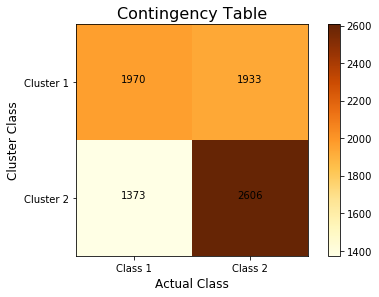

Report 5 Measures for K-Means Clustering
Homogeneity Score: 0.018910
Completeness Score: 0.019229
V-Measure Score: 0.019068
Adjusted Rand Index: 0.025839
Adjusted Mutual Information: 0.018820
n_components: 2
NMF complete after 0.332429 seconds
Finished clustering with 30 seeds in 0.138860 seconds
Show Contingency Matrix:


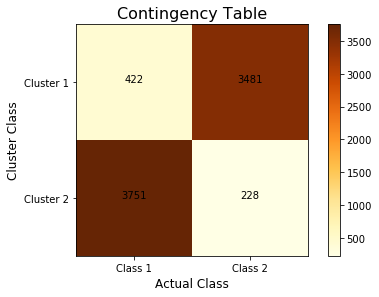

Report 5 Measures for K-Means Clustering
Homogeneity Score: 0.592964
Completeness Score: 0.594411
V-Measure Score: 0.593687
Adjusted Rand Index: 0.697299
Adjusted Mutual Information: 0.592927
n_components: 3
NMF complete after 0.426838 seconds
Finished clustering with 30 seeds in 0.124227 seconds
Show Contingency Matrix:


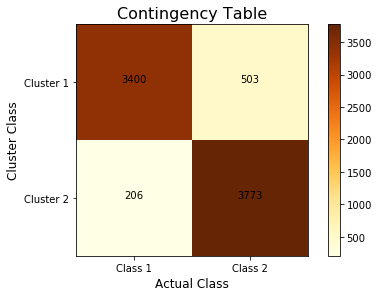

Report 5 Measures for K-Means Clustering
Homogeneity Score: 0.571965
Completeness Score: 0.574927
V-Measure Score: 0.573442
Adjusted Rand Index: 0.672517
Adjusted Mutual Information: 0.571926
n_components: 5
NMF complete after 1.892978 seconds
Finished clustering with 30 seeds in 0.188834 seconds
Show Contingency Matrix:


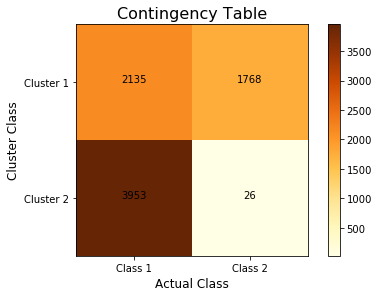

Report 5 Measures for K-Means Clustering
Homogeneity Score: 0.253134
Completeness Score: 0.327101
V-Measure Score: 0.285403
Adjusted Rand Index: 0.203906
Adjusted Mutual Information: 0.253065
n_components: 10
NMF complete after 1.217377 seconds
Finished clustering with 30 seeds in 0.213595 seconds
Show Contingency Matrix:


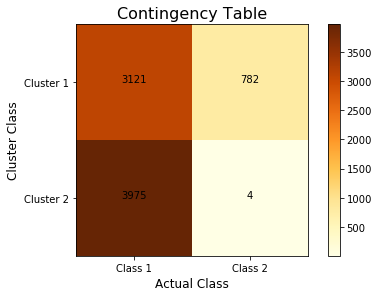

Report 5 Measures for K-Means Clustering
Homogeneity Score: 0.104493
Completeness Score: 0.223209
V-Measure Score: 0.142348
Adjusted Rand Index: 0.042771
Adjusted Mutual Information: 0.104411
n_components: 20
NMF complete after 3.425698 seconds
Finished clustering with 30 seeds in 0.293498 seconds
Show Contingency Matrix:


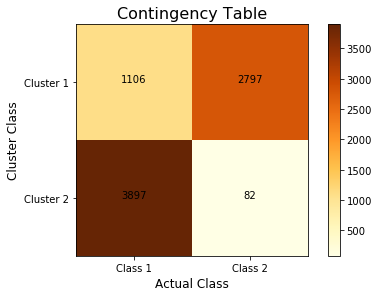

Report 5 Measures for K-Means Clustering
Homogeneity Score: 0.448020
Completeness Score: 0.473079
V-Measure Score: 0.460209
Adjusted Rand Index: 0.487914
Adjusted Mutual Information: 0.447969
n_components: 50
NMF complete after 32.517421 seconds
Finished clustering with 30 seeds in 0.668434 seconds
Show Contingency Matrix:


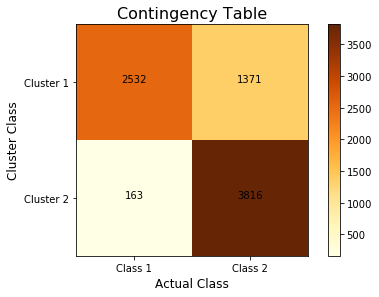

Report 5 Measures for K-Means Clustering
Homogeneity Score: 0.339037
Completeness Score: 0.365852
V-Measure Score: 0.351935
Adjusted Rand Index: 0.372949
Adjusted Mutual Information: 0.338976
n_components: 100
NMF complete after 116.294218 seconds
Finished clustering with 30 seeds in 0.743532 seconds
Show Contingency Matrix:


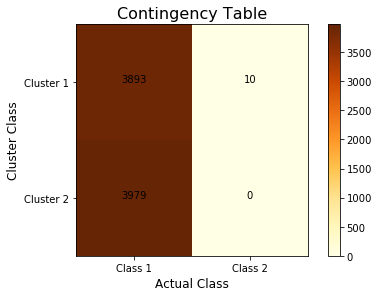

Report 5 Measures for K-Means Clustering
Homogeneity Score: 0.001288
Completeness Score: 0.091729
V-Measure Score: 0.002540
Adjusted Rand Index: 0.000055
Adjusted Mutual Information: 0.001191
n_components: 300
NMF complete after 802.066628 seconds
Finished clustering with 30 seeds in 2.914542 seconds
Show Contingency Matrix:


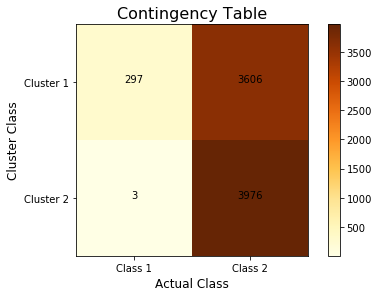

Report 5 Measures for K-Means Clustering
Homogeneity Score: 0.036575
Completeness Score: 0.156739
V-Measure Score: 0.059310
Adjusted Rand Index: 0.007000
Adjusted Mutual Information: 0.036486


In [138]:
nmf_homogeneity = []
nmf_completeness = []
nmf_v_measure = []
nmf_adjusted_mutual_info = []
nmf_adjusted_rand_index = []

for r in [1, 2, 3, 5, 10, 20, 50, 100, 300]:
    print('n_components:',r)
    nmf_dataset,nmf = nmf_dimension_reduction(X_tfidf, n_components = r)
    k_means = k_means_clustering(nmf_dataset, n_clusters=2,random_state=0,max_iter=1000,n_init=30)
    nmf_homogeneity.append(k_means['homogeneity'])
    nmf_completeness.append(k_means['completeness'])
    nmf_v_measure.append(k_means['v_measure'])
    nmf_adjusted_mutual_info.append(k_means['adjusted_mutual_info'])
    nmf_adjusted_rand_index.append(k_means['adjusted_rand_index'])
    


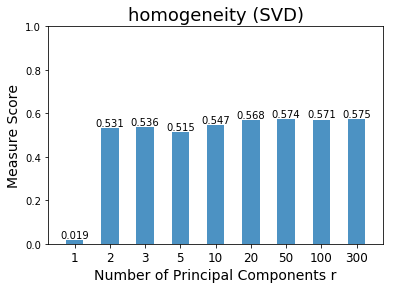

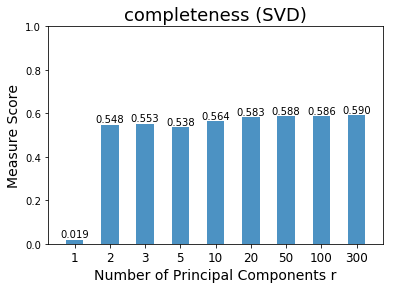

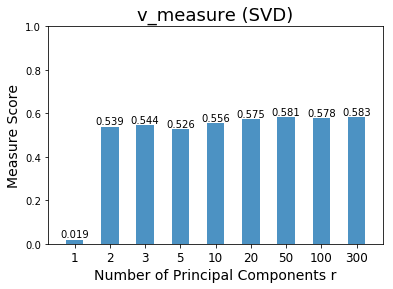

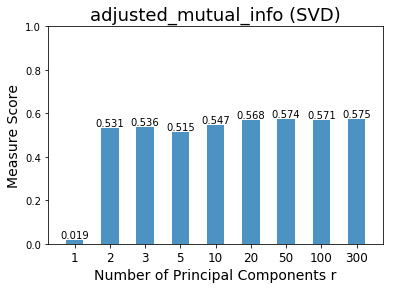

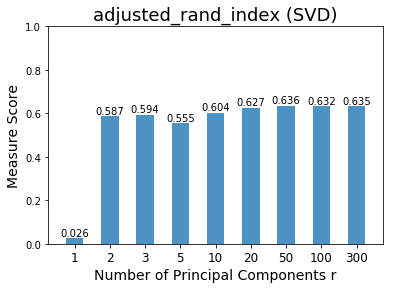

In [130]:
plot_histogram('SVD', 'homogeneity',svd_homogeneity)
plot_histogram('SVD', 'completeness',svd_completeness)
plot_histogram('SVD', 'v_measure',svd_v_measure)
plot_histogram('SVD', 'adjusted_mutual_info',svd_adjusted_mutual_info)
plot_histogram('SVD', 'adjusted_rand_index',svd_adjusted_rand_index)
               

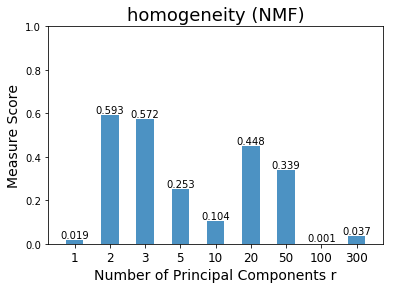

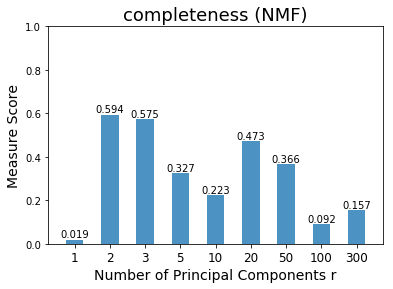

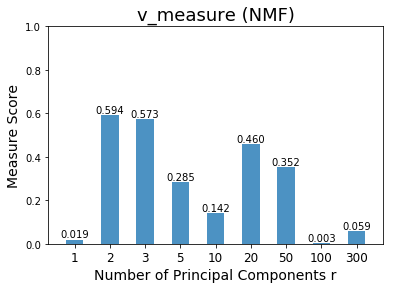

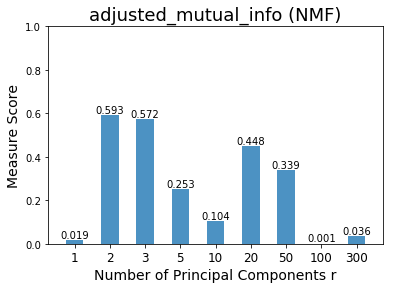

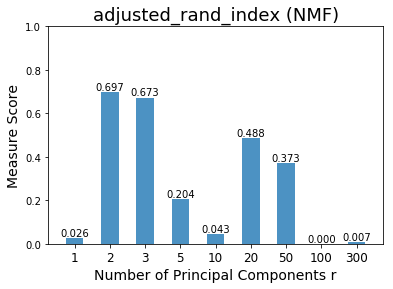

In [139]:
plot_histogram('NMF', 'homogeneity',nmf_homogeneity)
plot_histogram('NMF', 'completeness',nmf_completeness)
plot_histogram('NMF', 'v_measure',nmf_v_measure)
plot_histogram('NMF', 'adjusted_mutual_info',nmf_adjusted_mutual_info)
plot_histogram('NMF', 'adjusted_rand_index',nmf_adjusted_rand_index)
               

In [ ]:
# QUESTION 6: How do you explain the non-monotonic behavior of the measures as r
# increases?

In [ ]:
# QUESTION 7: Visualize the clustering results for:
#  SVD with its best r
#  NMF with its best r

In [ ]:
# QUESTION 8: Visualize the transformed data as in part (a).

In [ ]:
# QUESTION 9: Can you justify why the \logarithm transformation" may improve the
# clustering results?

In [ ]:
# QUESTION 10: Report the new clustering measures (except for the contingency ma-
# trix) for the clustering results of the transformed data.

In [ ]:
# QUESTION 11: Repeat the following for 20 categories using the same parameters as in
# 2-class case:
#  Transform corpus to TF-IDF matrix;
#  Directly perform K-means and report the 5 measures and the contingency matrix;

In [ ]:
# Apply K-means clustering with k=20 using the TF-IDF data. Use random_state=0, max_iter >= 1000, n_init>=30.
N_CLUSTERS = 20
RANDOM_STATE = 0
MAX_ITER = 1000
N_INIT = 30

km_20 = KMeans(n_clusters=N_CLUSTERS,random_state=RANDOM_STATE,max_iter=MAX_ITER,n_init=N_INIT)
start = time.time()
km_20.fit(X_tfidf)
print("Finished clustering with %i seeds in %f seconds" % (N_INIT, time.time()-start))

In [ ]:
print("QUESTION 11: Report 5 Measures for K-Means Clustering for 20 classes\n ")
contin_matrix = metrics.cluster.contingency_matrix(dataset.target, km_20.labels_)
print("Contingency Matrix:")
print(contin_matrix)
print_cluster_metrics(dataset.target, km_20)

In [ ]:
# QUESTION 12: Try different dimensions for both truncated SVD and NMF dimensional-
# ity reduction techniques and the different transformations of the obtained feature vectors as
# outlined in above parts.
# You don't need to report everything you tried, which will be tediously long. You are asked,
# however, to report your best combination, and quantitatively report how much better
# it is compared to other combinations. You should also include typical combinations
# showing what choices are desirable (or undesirable).

In [ ]:
pickle.dump(km_2,open("km_2.pkl","wb"))
pickle.dump(km_20,open("km_20.pkl","wb"))

In [ ]:
a = pickle.load(open("km_20.pkl","rb"))
b = pickle.load(open("km_2.pkl","rb"))